In [4]:
import sqlalchemy as sql
import pandas as pd
import glob
from os import path, sep
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal import oaconvolve

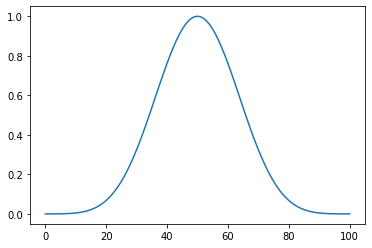

In [10]:
window = np.kaiser(101, 14)
plt.plot(window)


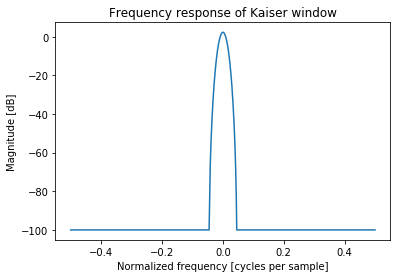

In [11]:
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)

plt.figure()
plt.plot(freq, response)

plt.title("Frequency response of Kaiser window")

plt.ylabel("Magnitude [dB]")

plt.xlabel("Normalized frequency [cycles per sample]")

plt.axis('tight')

plt.show()


In [12]:
from scipy.signal import remez

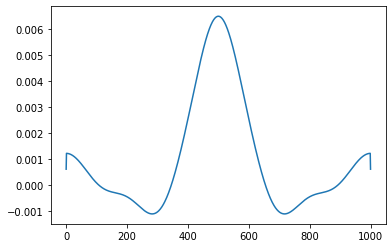

In [23]:
f = remez(1000,[0., 1., 8., 250.],[1.,0.],fs=500)
plt.plot(f)


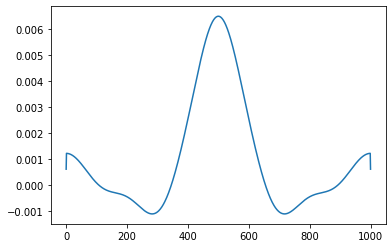

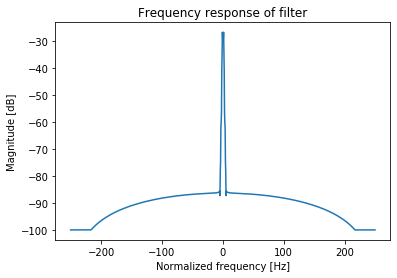

In [19]:
A = fft(f) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-250., 250., len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)

plt.figure()
plt.plot(freq, response)

plt.title("Frequency response of filter")

plt.ylabel("Magnitude [dB]")

plt.xlabel("Normalized frequency [Hz]")

plt.axis('tight')

plt.show()


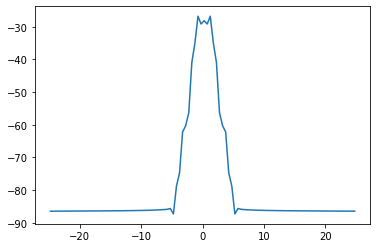

In [22]:
plt.figure();
plt.plot(freq[450:550],response[450:550])

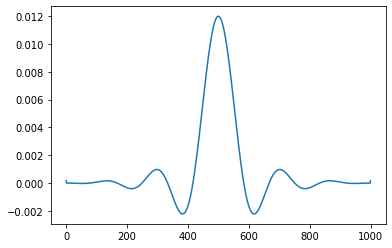

In [25]:
f2 = remez(1000,[0., 2., 4., 250.],[1.,0.],fs=500)
plt.plot(f2)


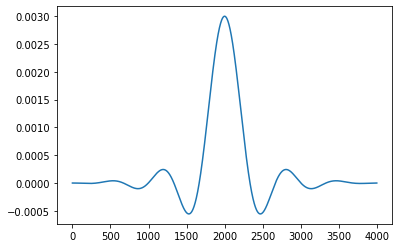

In [166]:
f3 = remez(4000,[0., 0.5, 1., 250.],[1.,0.],fs=500)
plt.plot(f3[1:-1])


In [209]:
len(f3)

4000

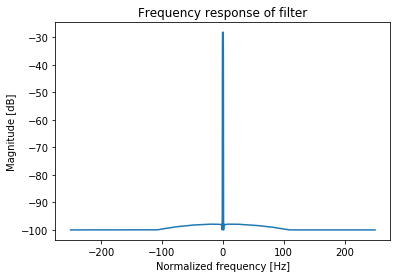

In [167]:
A = fft(f3) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-250., 250., len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)

plt.figure()
plt.plot(freq, response)

plt.title("Frequency response of filter")

plt.ylabel("Magnitude [dB]")

plt.xlabel("Normalized frequency [Hz]")

plt.axis('tight')

plt.show()


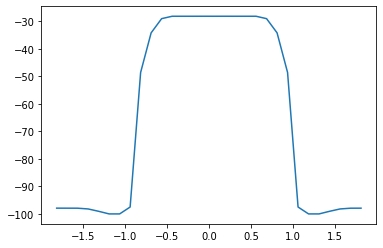

In [168]:
plt.figure();
plt.plot(freq[1985:2015],response[1985:2015])

In [28]:
server = "thesis.ca6j6heoraog.eu-central-1.rds.amazonaws.com"
engine = sql.create_engine(f"mysql+pymysql://admin:FphvsYQek4@{server}/thesis_db")


In [29]:
con = engine.connect()

In [31]:
stmnt = """
SELECT participant_id,
       data_ordinal,
       data_time,
       data_time_diff
FROM   raw_interval_data
WHERE  participant_id = 123
       AND series_type_id = 2  
       """
df = pd.read_sql(stmnt, con)

In [59]:
df

,participant_id,data_ordinal,data_time,data_time_diff
0,123,0,0.510,NaN
1,123,1,1.388,0.878
2,123,2,2.254,0.866
3,123,3,3.134,0.880
4,123,4,3.972,0.838
...,...,...,...,...
411,123,411,309.944,0.878
412,123,412,310.752,0.808
413,123,413,311.474,0.722
414,123,414,312.202,0.728


In [75]:
df1 = df
x = df1.data_time.to_numpy()
y = df1.data_time_diff.to_numpy()

x1 = np.zeros(len(x)*2-2)
x1[::2] = x[:-1]
x1[1::2] = x[:-1]
x1 = x1[1:-1]

y1 = np.zeros(len(y)*2-2)
print(len(x1),len(y1))
y1[::2] = y[1:]
y1[1::2] = y[1:]

y1 = y1[:-2]
print(len(x1),len(y1))
print(x1[:10])
print(y1[:10])

print(x1[820:])
print(y1[820:])

828 830
828 828
[0.51  1.388 1.388 2.254 2.254 3.134 3.134 3.972 3.972 4.81 ]
[0.878 0.878 0.866 0.866 0.88  0.88  0.838 0.838 0.838 0.838]
[309.066 309.944 309.944 310.752 310.752 311.474 311.474 312.202]
[0.878 0.878 0.808 0.808 0.722 0.722 0.728 0.728]


In [71]:
len(x), len(y)

(416, 416)

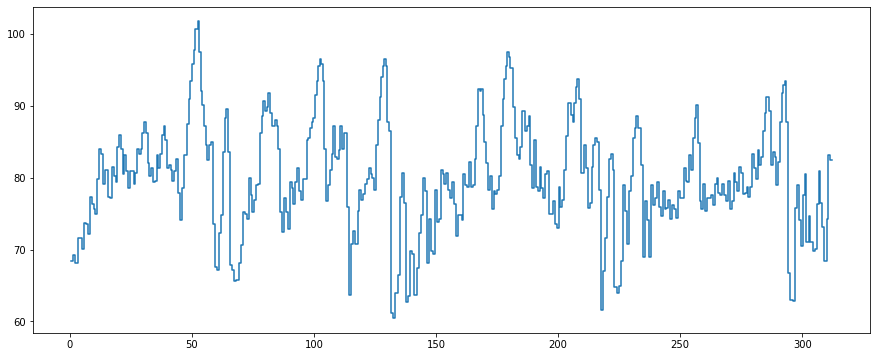

In [78]:
plt.figure(figsize=(15,6))
plt.plot(x1,60/y1)

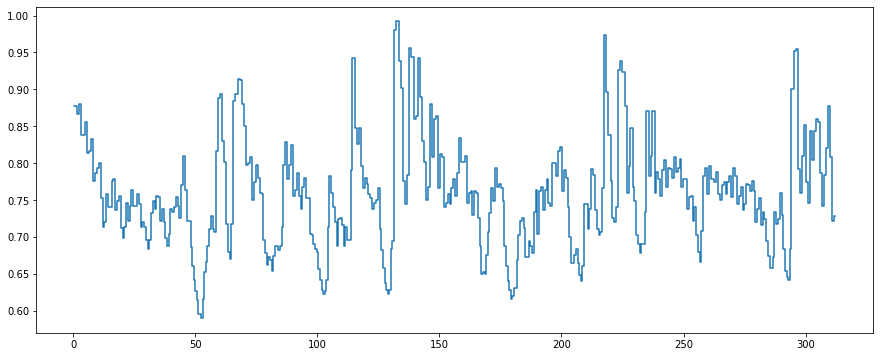

In [81]:
plt.figure(figsize=(15,6))
plt.plot(x1,y1);

In [98]:
def pw_constant_convo(pc_signal_x, pc_signal_y ,filter_h, filter_fs, xx):
    # assume signal_x denotes the beginning of each segment and that the signal is constant until the next x.
    cum_h = np.cumsum(h);
    Lh = len(filter_h);
    Lxx = len(xx)
    yy = np.zeros_like(xx)
    xx_window = [0,0]
    filter_range = np.array([-fs*np.floor(Lh/2), fs*np.floor(fs*Lh-np.floor(Lh/2))])
    in_events = pc_signal_x+filter_range[0]
    out_events = pc_signal_x[1:]+filter_range[1]
    i_in = i_out = 0
    events = []
    for i, curr_xx in enumerate(xx):
        while in_event[i_in] < curr_xx: 
            events.append(i_in)
            i_in += 1
        while out_event[i_out] < curr_xx:
            assert(events[0]==i_out)
            events=events[1:]
            i_out += 1
        curr_yy = pc_signal_y[events[0]]*(pc_signal_x[events[0]+1]-(curr_x+filter_range[0]))
        
        for event in events: # event is the index of
            
        curr_signal_x = pc_signal_x[i];
        curr_filter_range = curr_signal_x + filter_range
        while xx[xx_window[0]] < curr_filter_range[0]:
            xx_window[0] += 1
        while xx_window[1] != Lxx-1 and xx[xx_window[1]+1] < curr_filter_range[1]:
            xx_window[1] += 1
        if xx_window[0] > xx_window[1]:
            continue # this signal point does not affect any point in the resampled signal
        
        xx_of_interest = xx[xx_window[0]:xx_window[1]+1]
        

In [99]:
def pw_constant_to_dense(pc_signal_x, pc_signal_y,xx):
    # pc_signal_x: the *start point* of the segments with constant values
    # pc_signal_y: the constant values
    i = 0
    ii = 0
    yy = np.nan*np.zeros(len(xx))
    while xx[ii] < pc_signal_x[i]:
        ii += 1
    while i <= len(pc_signal_x)-2:
        while xx[ii+1] < pc_signal_x[i+1]:
            yy[ii] = pc_signal_y[i]
            ii += 1
        i += 1
    yy[ii:] = pc_signal_y[i]
    return yy

                   
    

In [133]:
xx = np.arange(0.6,x[-2],0.002)
yy = pw_constant_to_dense(x[:-2],y[1:-1],xx)

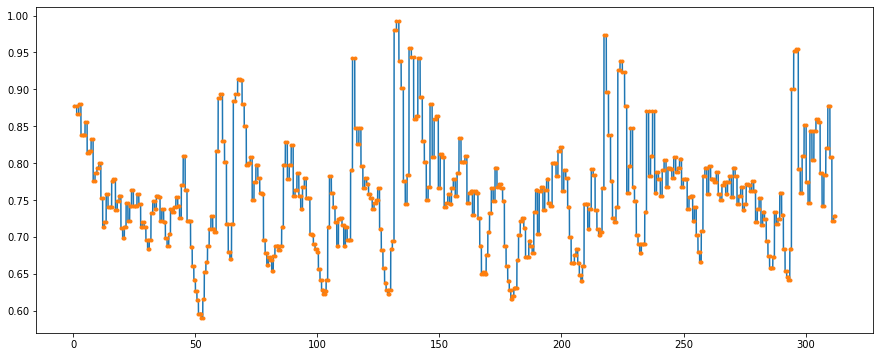

In [134]:
plt.figure(figsize=(15,6))
plt.plot(xx,yy)
plt.plot(x1,y1,'.');


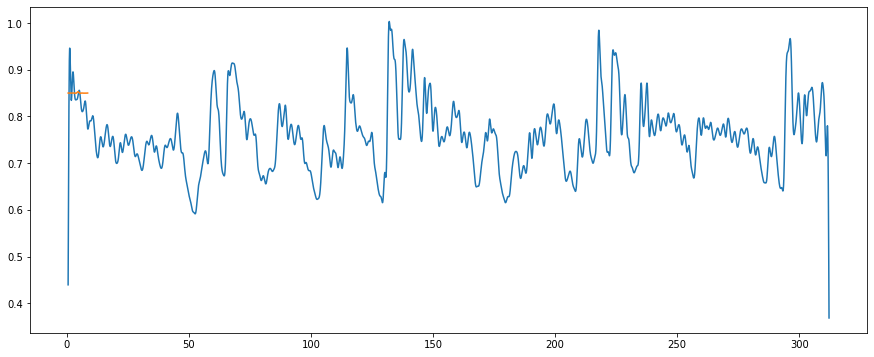

In [169]:
yy_smooth = oaconvolve(yy,f3,'same')
plt.figure(figsize=(15,6))
#plt.plot(xx,yy)
plt.plot(xx,yy_smooth);
plt.plot(xx[:len(f3)],f3+0.85)
#plt.xlim(0,100)

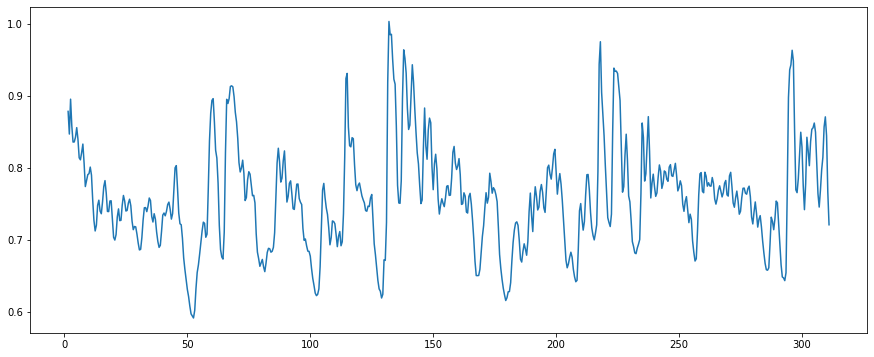

In [178]:
plt.figure(figsize=(15,6))
plt.plot(xx[500:-500:250],yy_smooth[500:-500:250])

In [179]:
xxp = xx[::250]
yyp = yy[::250]
print(len(xxp))


624


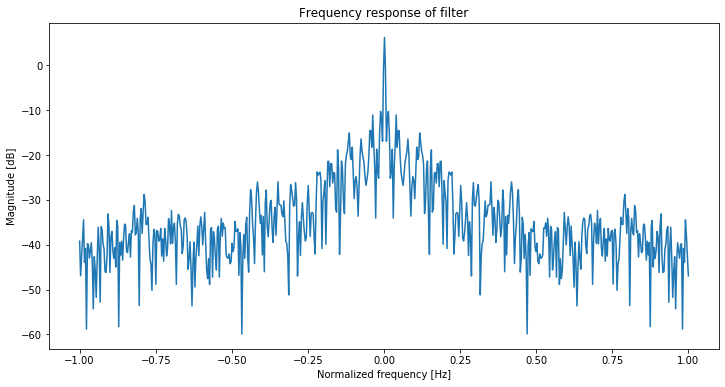

In [192]:
A = fft(np.hamming(len(yyp))*(yyp-0.8*np.mean(yyp))) / 25.
mag = np.abs(fftshift(A))

freq = np.linspace(-1., 1., len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)

plt.figure(figsize=(12,6))
plt.plot(freq, response)

plt.title("Frequency response of filter")

plt.ylabel("Magnitude [dB]")

plt.xlabel("Normalized frequency [Hz]")

plt.axis('tight')

plt.show()


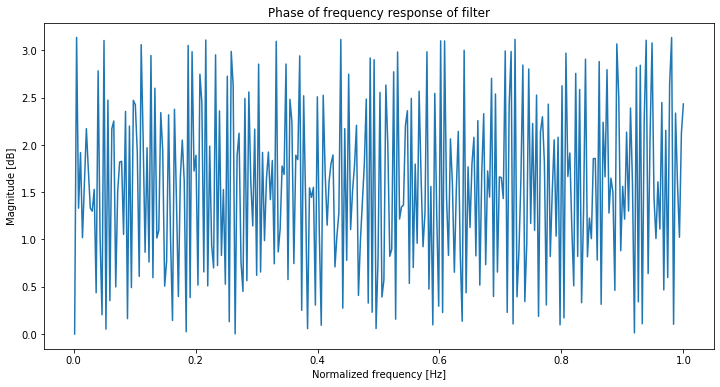

In [208]:
phase = np.angle(fftshift(A))
plt.figure(figsize=(12,6))
plt.plot(freq[int(len(phase)/2):], np.abs(phase[int(len(phase)/2):]))

plt.title("Phase of frequency response of filter")

plt.ylabel("Magnitude [dB]")

plt.xlabel("Normalized frequency [Hz]")

plt.axis('tight')

plt.show()


(-50, 500)

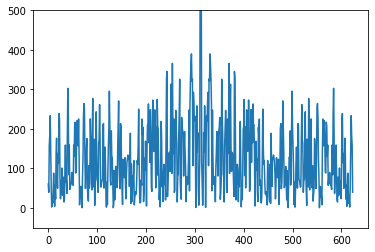

In [200]:
plt.plot(np.abs(np.correlate(phase,phase,'same')))
plt.ylim(-50,500)

In [122]:
yy[200:300]
print(xx[250],x[0])

0.5 0.51


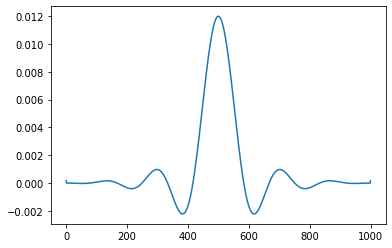

In [124]:
plt.plot(f2)

In [82]:
from scipy.signal import oaconvolve

In [90]:
xx = np.linspace(0,20,200)
signals = np.vstack([
    2*np.cos(4*xx)+5*np.sin(3*xx)+0.2*np.random.randn(len(xx)),
    2*np.cos(0.8*xx)+2*np.sin(5*xx)+0.1*np.random.randn(len(xx)),
]).T;

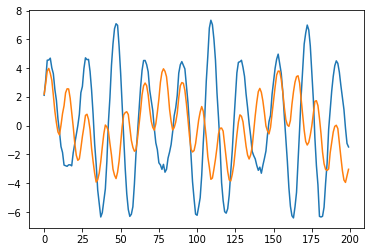

In [91]:
plt.plot(signals)